# **ML Project #2 - Housing Prices Predictor**

![House](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/The_Sheridan_Apartments%2C_Houston%2C_Texas.jpg/330px-The_Sheridan_Apartments%2C_Houston%2C_Texas.jpg)

Hey there, welcome to my ML GitHub's second project! This one is a classic. Housing prices prediction project is like ABC... for the practical machine learning world!

We are given a dataset (CSV file) and have been asked to build a simple model that, given certain data, will predict the price of the house a person is planning on buying!

This project consists of 4 core steps, often seen in almost all ML projects:


1. Import & Load Data
2. Exploratory Data Analysis
3. Preprocessing
4. Model Training + Prediction


Throughout the project you will see several such markdown boxes - they will explain what's gonna happen in the next few cells. But detailed explanation of each cell will be in the comments! Enjoy!

# **1. Import & Load Data**

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **2. Exploratory Data Analysis**

In [3]:
train.info()
train.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


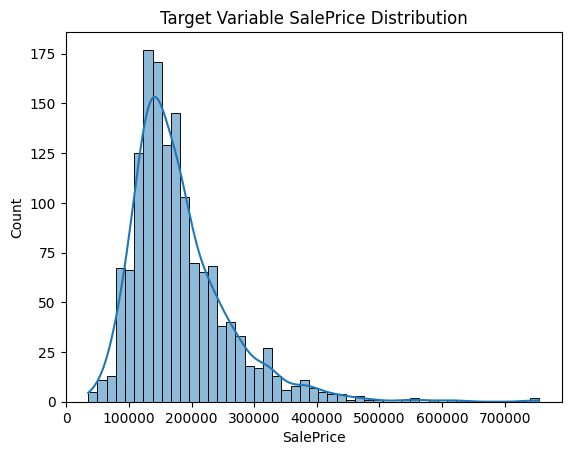

In [5]:
#below we are seeing target variable distribution
#it is right skewed so we'll have to deal with that later!

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['SalePrice'], kde=True)
plt.title('Target Variable SalePrice Distribution')
plt.show()

In [6]:
#making a correlation matrix
#tells us how much each feature affects the target variable!

corr = train.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


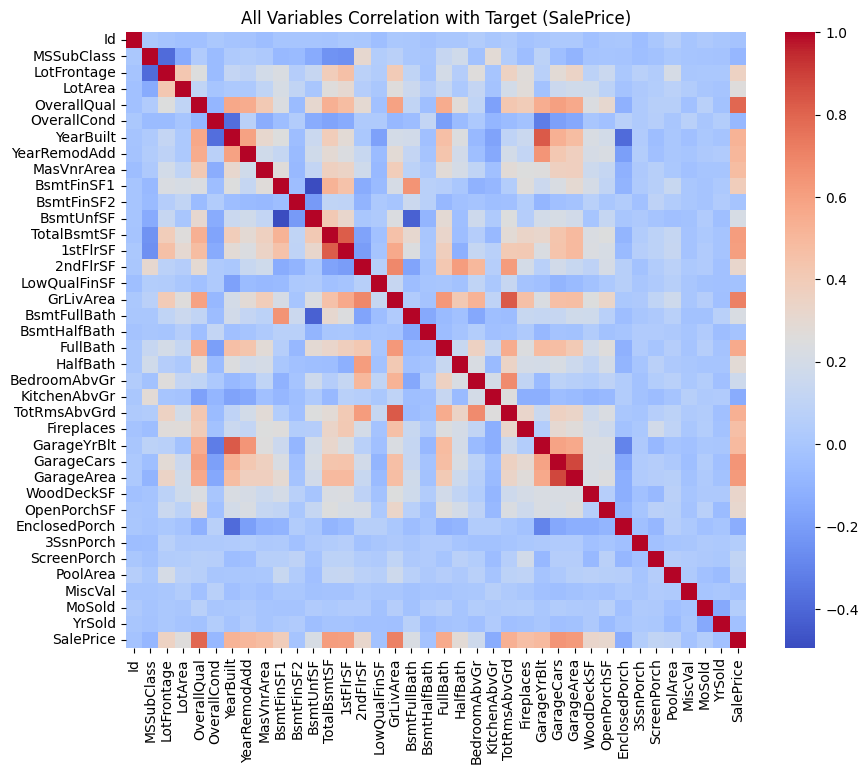

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), cmap = 'coolwarm')
plt.title('All Variables Correlation with Target (SalePrice)')
plt.show()

# **3. Preprocessing**

In [8]:
#separating the target variable

y = train['SalePrice']
train = train.drop(columns=['SalePrice'])

In [9]:
#combine the data, so that preprocessing becomes easier!
#features match, all preprocessing done together

all_data = pd.concat([train, test], keys=['train', 'test'])

In [10]:
#time to handle NULLS!
#drop columns with too much missing data
all_data = all_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

#fill categorical NA with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    all_data[col] = all_data[col].fillna('None')

#fill numerical NA with 0
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']:
    all_data[col] = all_data[col].fillna(0)

In [11]:
# Fill remaining with median or mode
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].median())
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [12]:
#encode categorical variables!
all_data = pd.get_dummies(all_data)

In [13]:
#remember the data was right skewed? this is how we handle that
import numpy as np
y_log = np.log1p(y)

In [14]:
#split back into train set and test set!
X_train = all_data.loc['train']
X_test = all_data.loc['test']

# **4. Model Training + Prediction**

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
def rmse_cv(model):
    rmse = -cross_val_score(model, X_train, y_log, scoring="neg_root_mean_squared_error", cv=5)
    return rmse.mean()

In [19]:
linreg = LinearRegression()
print("Linear Regression RMSE:", rmse_cv(linreg))

Linear Regression RMSE: 0.15516532173752834


In [20]:
ridge = Ridge(alpha=10)
print("Ridge Regression RMSE:", rmse_cv(ridge))

Ridge Regression RMSE: 0.13936080568739134


In [21]:
lasso = Lasso(alpha=0.001)
print("Lasso Regression RMSE:", rmse_cv(lasso))

Lasso Regression RMSE: 0.13855667284546286


In [22]:
lasso.fit(X_train, y_log)

Lasso(alpha=0.001)

In [24]:
preds = lasso.predict(X_test)
final_preds = np.expm1(preds)  # undo log1p

In [26]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": final_preds
})

submission.to_csv("submission.csv", index=False)